In [65]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/varshithbr/Desktop/case study final exam/finaldatasetnew2.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Name,Blood Type,age,Sex,ChestPain,BloodPressure,Cholesterol,BloodSugar,ECG,HeartRate,Angina,Depression,Slope,Vessels,Thalassemia,output
0,Bobby JacksOn,B-,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,LesLie TErRy,A+,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,DaNnY sMitH,A-,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,andrEw waTtS,O+,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,adrIENNE bEll,AB+,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [45]:
# 1. Check for missing values
print("Missing Values:\n", df.isnull().sum())

# 2. Handle missing values by filling them with the mean (for numerical columns)
# df.fillna(df.mean(), inplace=True)

# 3. Check data types
print("\nData Types:\n", df.dtypes)

# 4. Convert categorical columns to appropriate types (if necessary)
# For example, if you know a column should be categorical:
# df['column_name'] = df['column_name'].astype('category')



Missing Values:
 Name             0
Blood Type       0
age              0
Sex              0
ChestPain        0
BloodPressure    0
Cholesterol      0
BloodSugar       0
ECG              0
HeartRate        0
Angina           0
Depression       0
Slope            0
Vessels          0
Thalassemia      0
output           0
dtype: int64

Data Types:
 Name              object
Blood Type        object
age                int64
Sex                int64
ChestPain          int64
BloodPressure      int64
Cholesterol        int64
BloodSugar         int64
ECG                int64
HeartRate          int64
Angina             int64
Depression       float64
Slope              int64
Vessels            int64
Thalassemia        int64
output             int64
dtype: object


              age         Sex   ChestPain  BloodPressure  Cholesterol  \
count  303.000000  303.000000  303.000000     303.000000   303.000000   
mean    54.366337    0.683168    0.966997     131.623762   246.264026   
std      9.082101    0.466011    1.032052      17.538143    51.830751   
min     29.000000    0.000000    0.000000      94.000000   126.000000   
25%     47.500000    0.000000    0.000000     120.000000   211.000000   
50%     55.000000    1.000000    1.000000     130.000000   240.000000   
75%     61.000000    1.000000    2.000000     140.000000   274.500000   
max     77.000000    1.000000    3.000000     200.000000   564.000000   

       BloodSugar         ECG   HeartRate      Angina  Depression       Slope  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.148515    0.528053  149.646865    0.326733    1.039604    1.399340   
std      0.356198    0.525860   22.905161    0.469794    1.161075    0.616226   
min      0.000000 

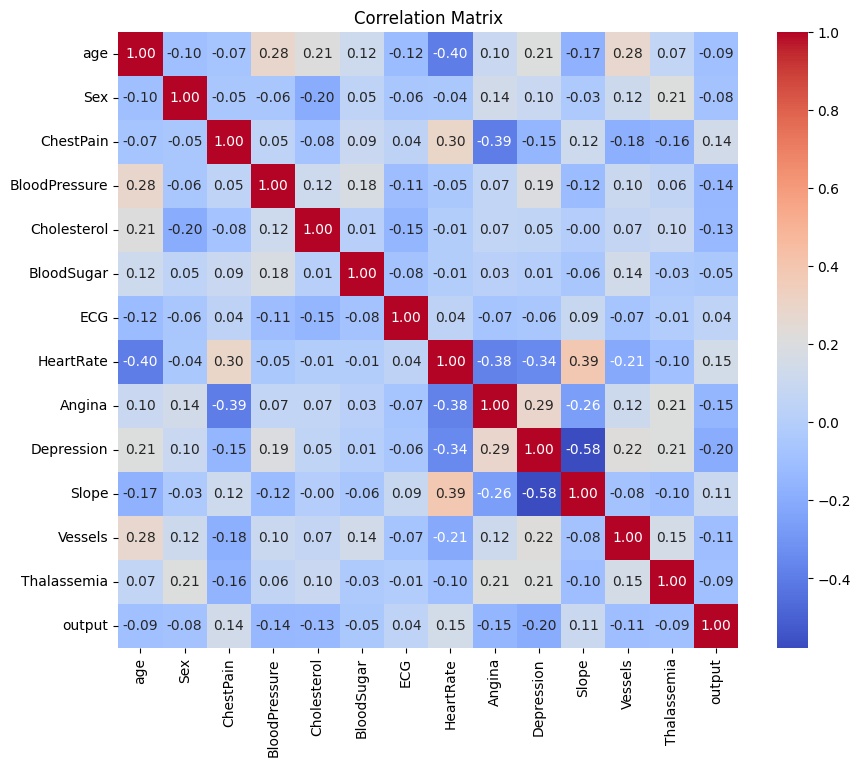

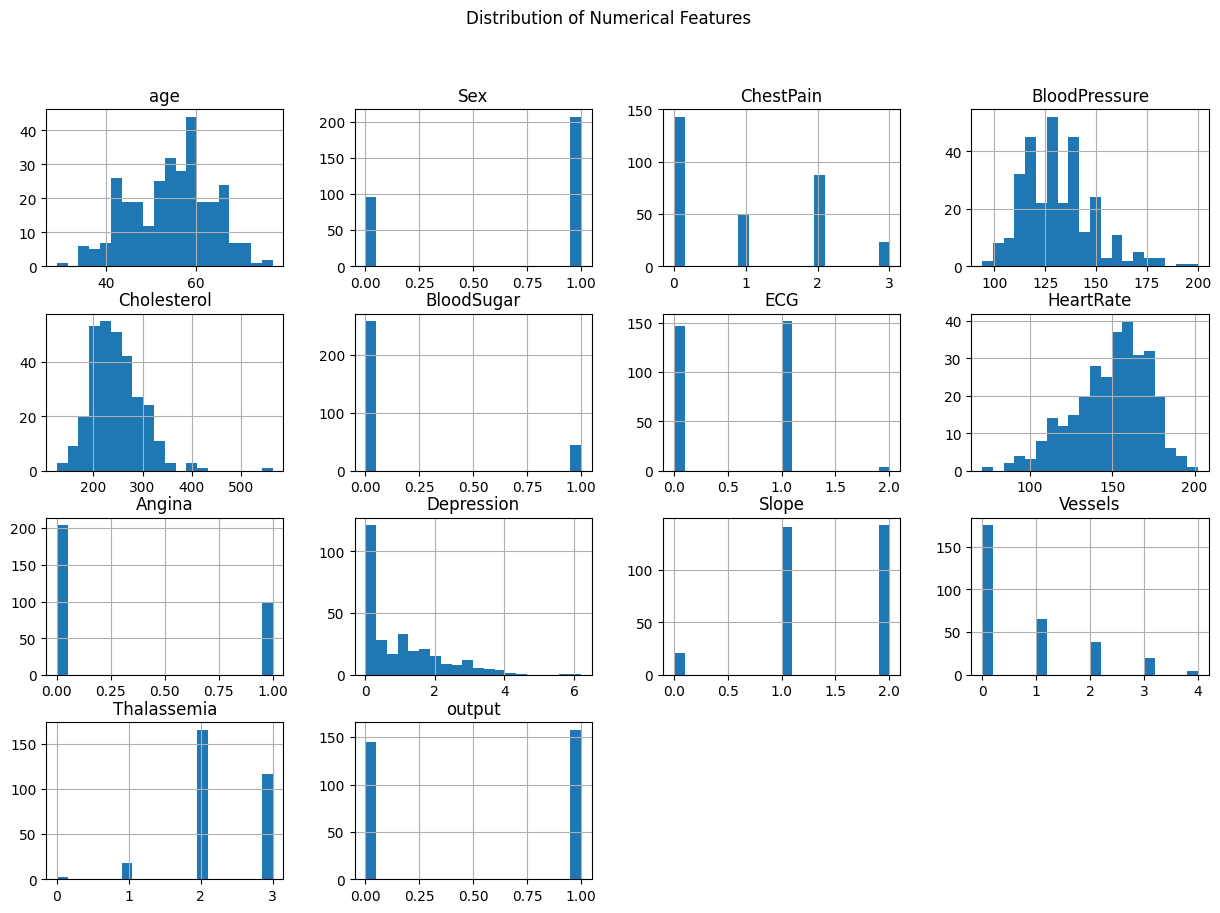

C:\Users\varshithbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


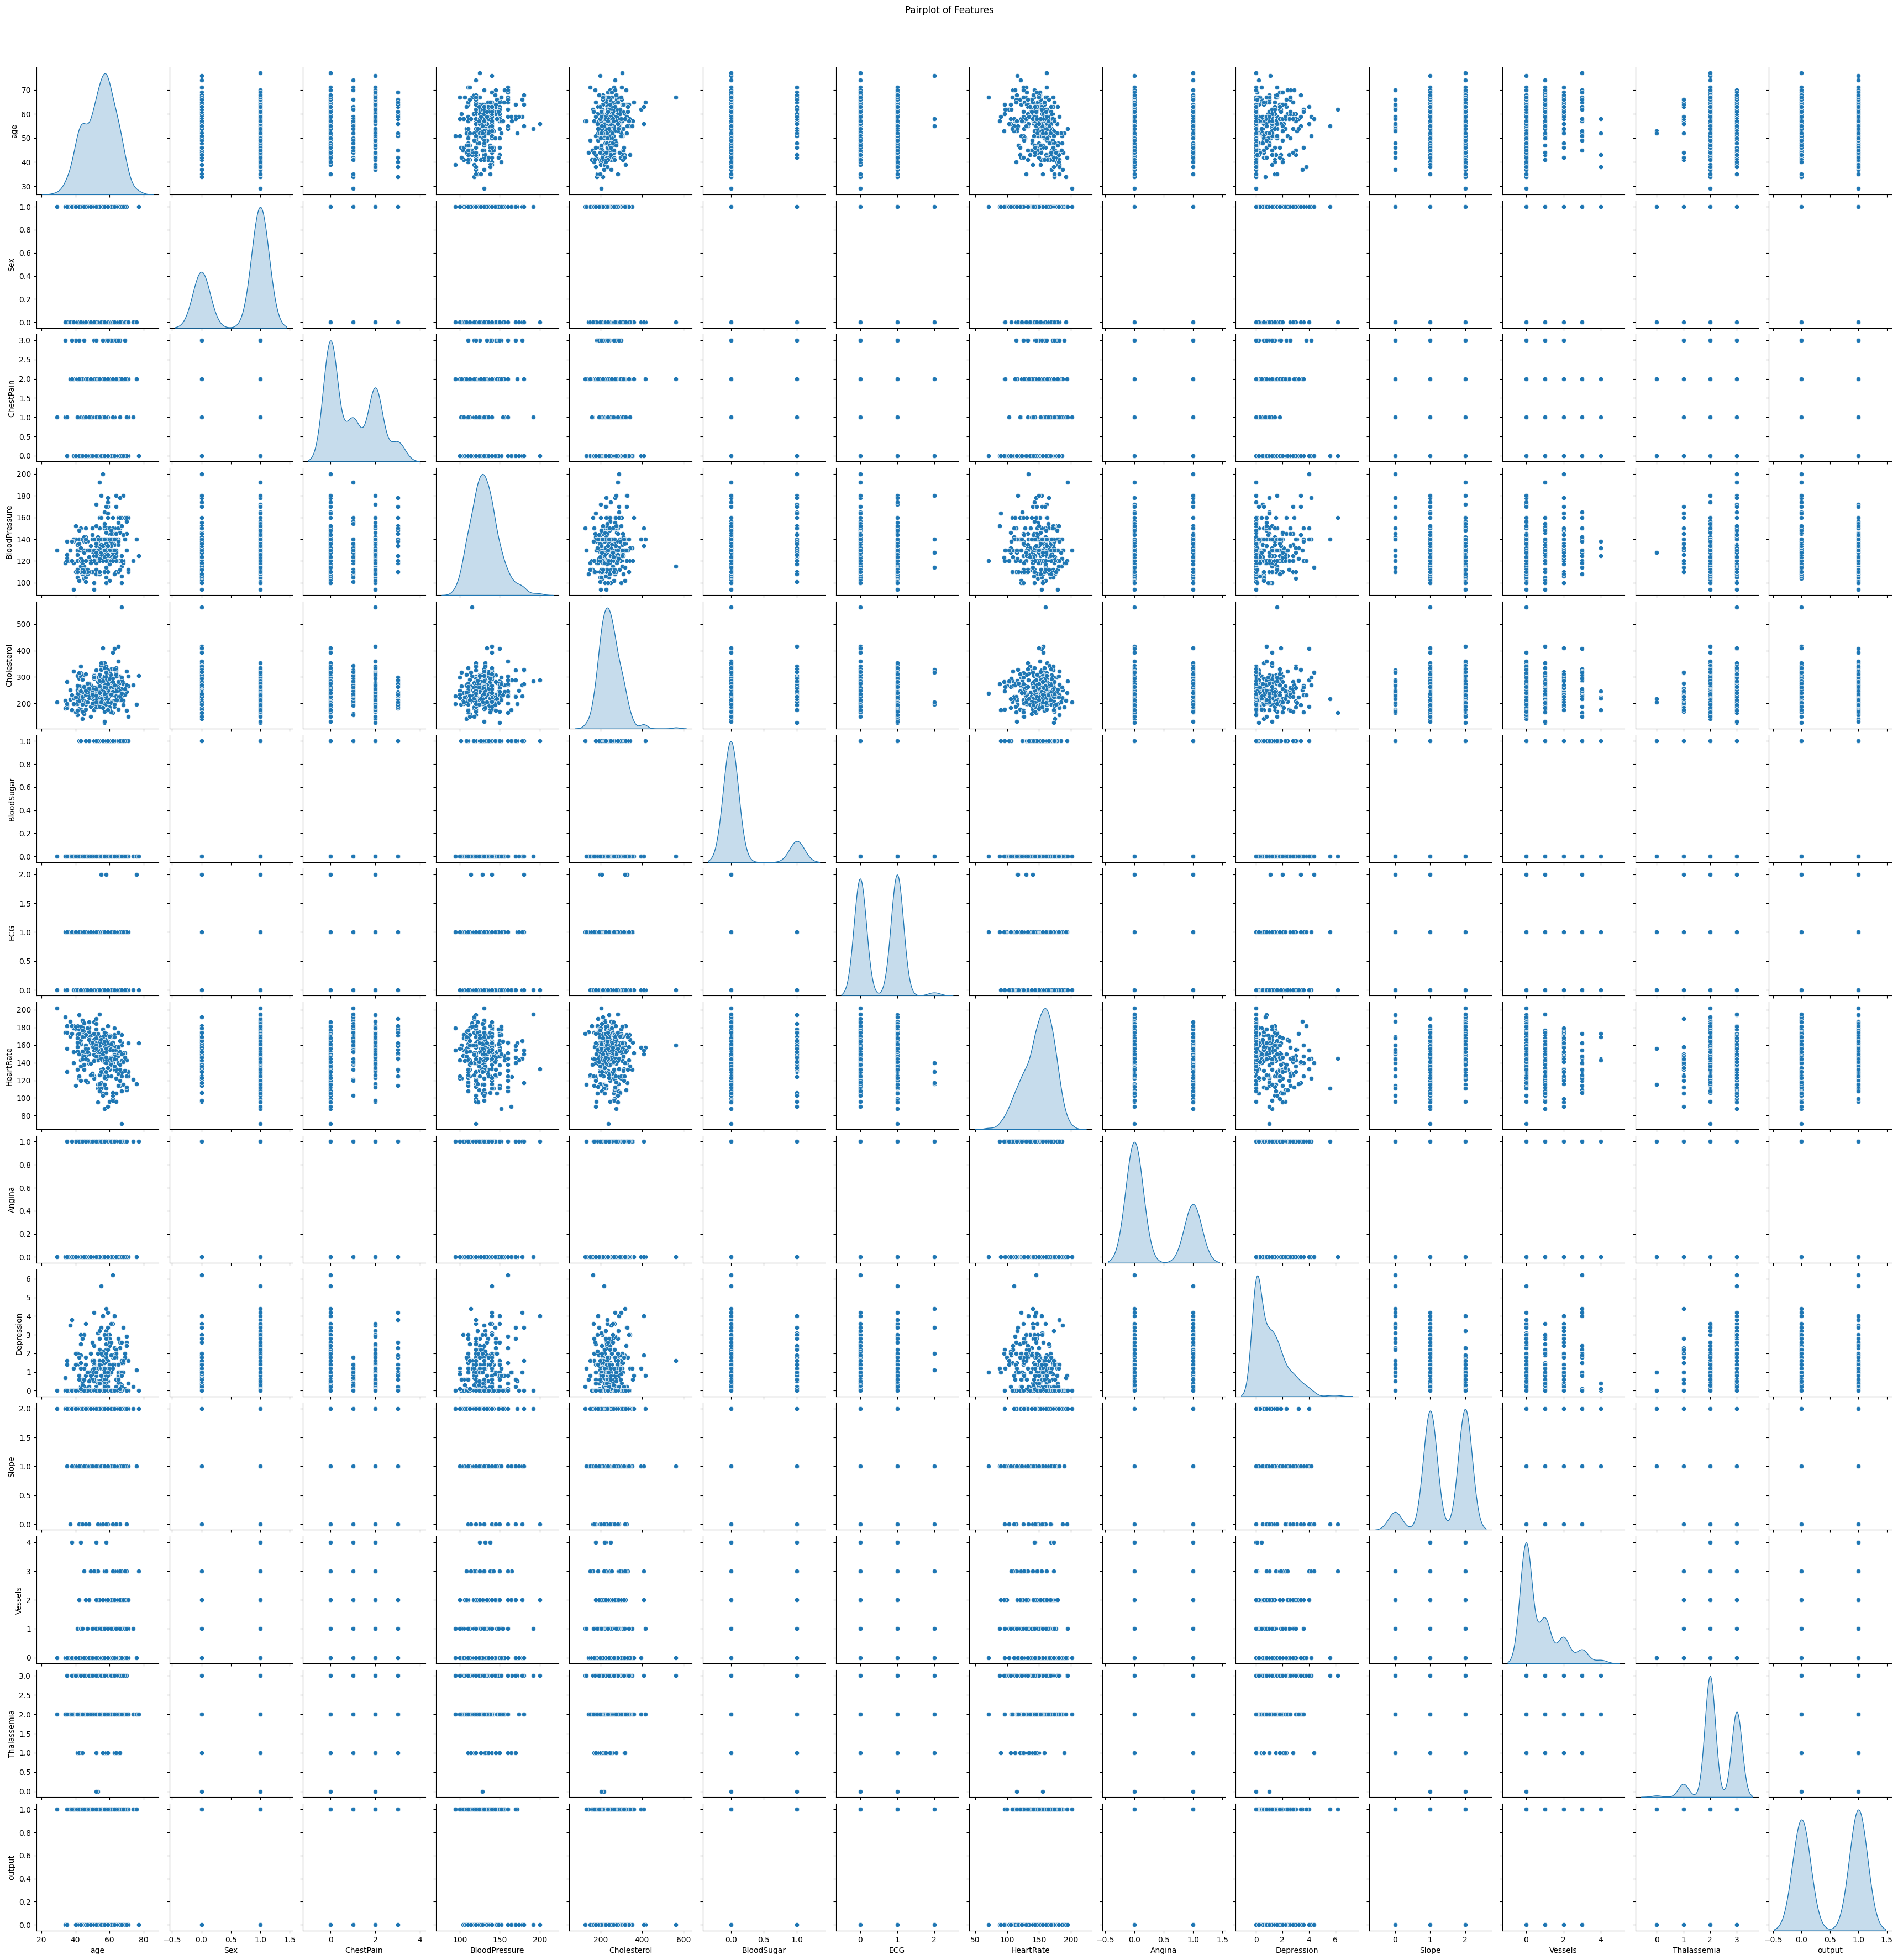

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df.describe())



rem = [
     'Name', 'Blood Type']

# Drop the specified columns
df_clean = df.drop(columns=rem)

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Distribution plots for numerical features
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features")
plt.show()

# Pairplot to visualize relationships between features
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

# Countplot for categorical variables (if any)
# Example: sns.countplot(x='categorical_column', data=df)


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df=df_clean
# Define the target and features
X = df[['Depression','HeartRate','Angina','Slope']]  # Replace 'target_column' with the actual name
y = df['output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (if necessary)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[25 16]
 [15 35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.61      0.62        41
           1       0.69      0.70      0.69        50

    accuracy                           0.66        91
   macro avg       0.66      0.65      0.66        91
weighted avg       0.66      0.66      0.66        91

Accuracy: 0.6593406593406593


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = df_clean
# Define the target and features
X = df[['Depression','HeartRate','Angina','Slope']]
y = df['output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (if necessary)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[26 15]
 [25 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.63      0.57        41
           1       0.62      0.50      0.56        50

    accuracy                           0.56        91
   macro avg       0.57      0.57      0.56        91
weighted avg       0.57      0.56      0.56        91

Accuracy: 0.5604395604395604


In [53]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = df_clean
# Define the target and features
X = df[['Depression','HeartRate','Angina','Slope']]
y = df['output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (if necessary)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[26 15]
 [22 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.63      0.58        41
           1       0.65      0.56      0.60        50

    accuracy                           0.59        91
   macro avg       0.60      0.60      0.59        91
weighted avg       0.60      0.59      0.59        91

Accuracy: 0.5934065934065934


In [54]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = df_clean
# Define the target and features
X = df[['Depression','HeartRate','Angina','Slope']]
y = df['output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (if necessary)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the SVM model with RBF kernel
model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[25 16]
 [19 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.61      0.59        41
           1       0.66      0.62      0.64        50

    accuracy                           0.62        91
   macro avg       0.61      0.61      0.61        91
weighted avg       0.62      0.62      0.62        91

Accuracy: 0.6153846153846154


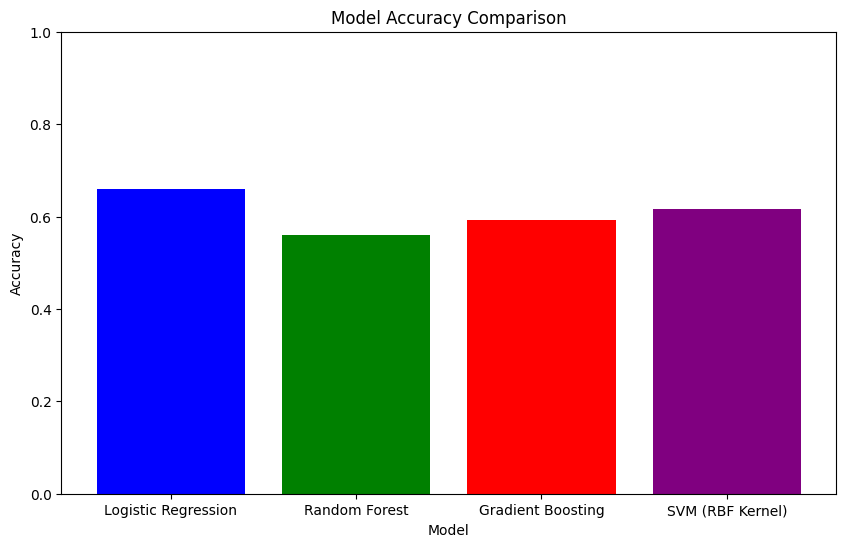

In [56]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM (RBF Kernel)': SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
}


accuracies = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim([0, 1])
plt.show()

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming df_clean is your original DataFrame

# Copy the original dataframe to preserve the original data
df_modified = df.copy()

# List of columns to modify (excluding 'Name', 'Blood Type', and 'age')
columns_to_modify = df_modified.columns.difference(['Name', 'Blood Type', 'age'])

# Function to randomly modify numerical values except 0 and 1
def randomize_column_values(column):
    # Randomize only values not equal to 0 or 1
    mask = (column != 0) & (column != 1)
    # Use .loc[] to ensure we're modifying the DataFrame correctly
    column.loc[mask] = np.random.randint(2, 100, size=mask.sum())  # Random values between 2 and 99
    return column

# Apply the function to each numerical column
for col in columns_to_modify:
    if df_modified[col].dtype in ['int64', 'float64']:
        df_modified[col] = randomize_column_values(df_modified[col])

# Split the modified data into features and target
X = df_modified.drop(columns=['output', 'Name', 'Blood Type'])
y = df_modified['output']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train a logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'Model Accuracy: {accuracy:.2f}')


Model Accuracy: 0.63


C:\Users\varshithbr\AppData\Local\Temp\ipykernel_6928\1326712669.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.loc[mask] = np.random.randint(2, 100, size=mask.sum())  # Random values between 2 and 99
C:\Users\varshithbr\AppData\Local\Temp\ipykernel_6928\1326712669.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.loc[mask] = np.random.randint(2, 100, size=mask.sum())  # Random values between 2 and 99
C:\Users\varshithbr\AppData\Local\Temp\ipykernel_6928\1326712669.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentati